In [2]:
import numpy as np

spots = np.load(r"V:\20230515D101Myh67d15\AnalysisDeconvolveCGBB\Conv_zscan__000--H1_B1_2_3--col0__Xhfits.npz")

In [5]:
list(spots.keys())

['Xh']

In [7]:
spots["Xh"].shape

(29170, 8)

In [8]:
spots["Xh"]

array([[9.8941076e-01, 6.9068961e+00, 1.7392676e+02, ..., 7.3650000e+03,
        4.4777116e-01, 2.6842893e+04],
       [8.6622590e-01, 4.9901337e+01, 5.4927747e+02, ..., 1.4680000e+03,
        5.1433337e-01, 8.0698794e+03],
       [9.1811788e-01, 2.5573227e+02, 3.9607062e+02, ..., 1.1610000e+03,
        4.6763396e-01, 3.9647056e+03],
       ...,
       [2.9156612e+01, 1.9249819e+03, 1.5561125e+03, ..., 2.1100000e+03,
        6.4091432e-01, 6.1857031e+03],
       [3.0755068e+01, 1.9388987e+03, 1.5543335e+03, ..., 1.8160000e+03,
        6.8012363e-01, 3.8835117e+03],
       [4.3914333e+01, 1.5551477e+03, 1.8859413e+03, ..., 9.0500000e+02,
        7.3927414e-01, 4.7759302e+03]], dtype=float32)

In [17]:
spots["Xh"][:,4]

array([0.14435096, 0.4621885 , 0.41823396, ..., 0.41117114, 0.41564867,
       0.66282237], dtype=float32)

In [18]:
#0,1,2 = z, x, y
#-1 (7) = brightness
#-4 (4) = correlation with PSF >0.5

In [19]:
from ioMicro import read_im

In [21]:
img = read_im(r"U:\20230515D101Myh67d15\H1_B1_2_3\Conv_zscan_F_000.zarr")

In [23]:
img = img[0::4]

In [30]:
imgm = img.max(axis=0)

In [31]:
spotsf = spots["Xh"]
spotsf = spotsf[spotsf[:,-4] > 0.5]
spotsf = spotsf[spotsf[:,-1] > 2500]

In [34]:
spotsf.shape

(21653, 8)

(250.0, 500.0)

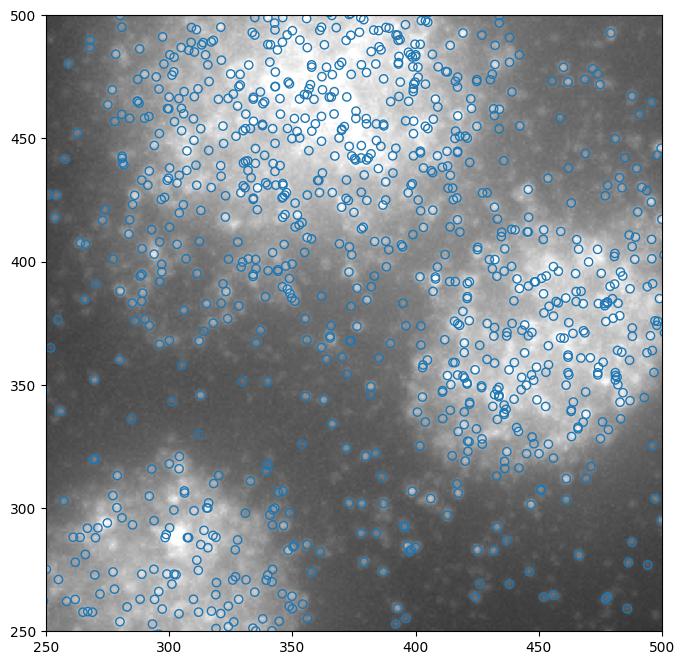

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(img.max(axis=0), cmap="gray", vmax=2500)
plt.scatter(spotsf[:,2], spotsf[:,1], facecolors="none", edgecolors="tab:blue")
plt.xlim(250,500)
plt.ylim(250,500)